In [ ]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score,accuracy_score,confusion_matrix,classification_report,log_loss,precision_score,recall_score

In [2]:
# Reading data
data=pd.read_csv('ChurnData.csv')
data.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [3]:
# Converting churn column from float to int
data['churn']=data['churn'].astype('int')
data.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


In [4]:
# SHAPE OF DIMENSION
data.shape

(200, 28)

In [5]:
# DATAFRAME TO ARRAY
x=np.asanyarray(data[['tenure','age','ed']])
y=np.asanyarray(data['churn'])

In [6]:
# TRAIN - TEST - SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

In [7]:
# preprocessing
scaler=preprocessing.MinMaxScaler()
x=scaler.fit(x)

In [8]:
# TRAINING THE MODEL
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# ACTUAL 
predict_actual=lr.predict(x_test)  
accuracy_actual=lr.score(x_test,y_test)
classification_report_actual=classification_report(y_test,predict_actual)
print(predict_actual,accuracy_actual,classification_report_actual,sep='\n')

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
0.75
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        38
           1       0.89      0.36      0.52        22

    accuracy                           0.75        60
   macro avg       0.81      0.67      0.67        60
weighted avg       0.79      0.75      0.72        60



[-0.1652293650905401, -1.3855175544992746, -1.8175637158828177, 0.3053844934546842, -0.3620243417653427, -1.6695237325438823, -1.5292662110152855, -1.8601608103769536, -1.5971547968559148, -3.060491036147829, -0.3276606615964298, -1.8184898002101715, -4.615441292760215, -3.21641519449136, -0.007840860074615263, -0.2625261494402745, -0.7085855779419451, -3.7959630768687993, -1.2419579210076774, 0.5945207728194132, -1.0699161733343279, -1.3575737026625632, -0.2795698230974458, 0.4771643116375631, -1.8530281000393978, -2.336743544739496, 0.5825198906522066, -2.210140275074913, -0.04237915990384178, -1.41621548002046, -2.631097235254503, -0.15047440923885935, 0.0069140957770655875, -2.439446763263922, -0.7872870321319575, -0.9644732844895277, -0.0798461530778557, 0.19078210595730793, -0.30228186041977934, 0.15459043643127446, -1.4372885510100866, -0.337009183273419, -1.0858591430038325, -2.400966375932397, -3.6333427573384953, -1.21750520415838, 0.7356026654811069, -1.4815246118369285, -0.

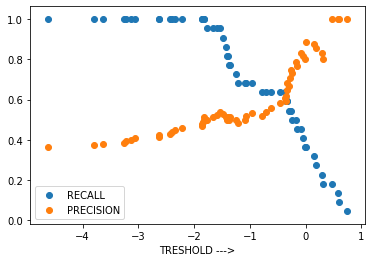

In [22]:
# LET MY PROJECT IS RECALL-ORIENTED.
# AIM HERE TO SELECT BEST VALUE FOR DECISION_TRESHOLD TO  GET HIGH RECALL.
# SO TO SELECT GOOD DECISION_TEESHOLD WE PLOT PRECISION-RECALL-VARIOUS_DECISION_TEESHOLD CURVE.
decision_function=lr.decision_function(x_test)
predict_desired=[]
lst_precision=[]
lst_recall=[]
lst_decision_treshold=list(decision_function)
for i in range(len(decision_function)):
    decision_treshold=decision_function[i]
    for j in range(len(decision_function)):
        if decision_function[j]<decision_treshold:
            predict_desired.append(0)
        else:
            predict_desired.append(1)
    recall=recall_score(y_test,predict_desired)
    precision=precision_score(y_test,predict_desired)
    lst_recall.append(recall)
    lst_precision.append(precision)
    predict_desired=[]
        
# PLOT THE CURVE
plt.scatter(lst_decision_treshold,lst_recall,label='RECALL')
plt.scatter(lst_decision_treshold,lst_precision,label='PRECISION')
plt.legend()
plt.xlabel('TRESHOLD --->')

print(lst_decision_treshold)

In [39]:
# THEREFOR DECISION_TRESHOLD BE AROUND -0.8....  TO GET HIGH RECALL.
# DESIRED.
df=lr.decision_function(x_test)
decision_teshold=-0.7872870321319575
desired_predict=[]
for i in df:
    if i<decision_teshold:
        desired_predict.append(0)
    else:
        desired_predict.append(1)
accuracy_obtained_due_to_change=accuracy_score(y_test,desired_predict)
required_recall=recall_score(y_test,desired_predict)
required_classification_report=classification_report(y_test,desired_predict)
print(desired_predict,accuracy_obtained_due_to_change,required_classification_report,required_recall,sep='\n')

[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]
0.65
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.52      0.64      0.57        22

    accuracy                           0.65        60
   macro avg       0.64      0.65      0.64        60
weighted avg       0.67      0.65      0.66        60

0.6363636363636364
